<a href="https://colab.research.google.com/github/DN554/Churn-Modelling/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
#SLICING
df[100:120]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
100,101,15808582,Fu,665,France,Female,40,6,0.00,1,1,1,161848.03,0
101,102,15743192,Hung,623,France,Female,44,6,0.00,2,0,0,167162.43,0
102,103,15580146,Hung,738,France,Male,31,9,82674.15,1,1,0,41970.72,0
103,104,15776605,Bradley,528,Spain,Male,36,7,0.00,2,1,0,60536.56,0
104,105,15804919,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
105,106,15613854,Mauldon,622,Spain,Female,46,4,107073.27,2,1,1,30984.59,1
106,107,15599195,Stiger,582,Germany,Male,32,1,88938.62,1,1,1,10054.53,0
107,108,15812878,Parsons,785,Germany,Female,36,2,99806.85,1,0,1,36976.52,0
108,109,15602312,Walkom,605,Spain,Male,33,5,150092.80,1,0,0,71862.79,0
109,110,15744689,T'ang,479,Germany,Male,35,9,92833.89,1,1,0,99449.86,1


In [7]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
#Drop column
df1=df.drop(['CustomerId','Surname'],axis=1)
df1

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [11]:
df1.columns

Index(['RowNumber', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

**Encoding categorical data**

In [12]:
df1['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
df1.Geography.value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [14]:
df1['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [15]:
df1.Tenure.value_counts()

,count
Tenure,
2,1048
1,1035
7,1028
8,1025
5,1012
3,1009
4,989
9,984
6,967


In [16]:
df1['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [17]:
df1.Age.value_counts()

,count
Age,
37,478
38,477
35,474
36,456
34,447
...,...
84,2
82,1
88,1


In [18]:
df1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
df1.Gender.value_counts()

,count
Gender,
Male,5457
Female,4543


In [20]:
df1['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [21]:
df1.NumOfProducts.value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


In [22]:
df1['EstimatedSalary'].unique()

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [23]:
df1['EstimatedSalary'].value_counts()

,count
EstimatedSalary,
24924.92,2
121505.61,1
89874.82,1
72500.68,1
182692.80,1
...,...
188377.21,1
55902.93,1
4523.74,1


In [24]:
# germany and spain ko columns bana hain . making dummies
df2=pd.get_dummies(df1['Geography'])
df2

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [25]:
df1=pd.get_dummies(df1,columns=['Geography','Gender'],drop_first=True)
df1

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,3,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,9997,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,9998,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,9999,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [26]:
# converting true and false into binary
df1['Geography_Germany']=df1['Geography_Germany'].astype(int)
df1['Geography_Spain']=df1['Geography_Spain'].astype(int)
df1['Gender_Male']=df1['Gender_Male'].astype(int)

In [27]:
df1

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [28]:
df1.to_excel('Churn_Modelling_new.xlsx')

In [29]:
df1['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


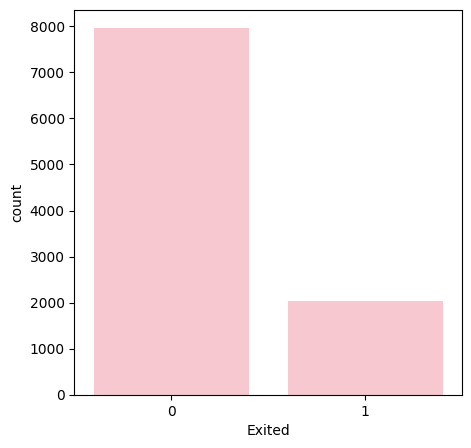

In [30]:
plt.figure(figsize=(5,5))
sns.countplot(x='Exited',data=df1,color="pink")
plt.show()

In [31]:
df3=df1.corr()
df3

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,1.000000,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571,-0.000044,-0.009905,0.018196
CreditScore,0.005840,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,0.000783,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,-0.006495,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,-0.009067,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.007246,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,0.000599,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.012044,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.005988,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.016571,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512


In [33]:
X=df1.drop('Exited',axis=1)   # X is independent variable
X

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,2,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,3,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,4,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,9997,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,9998,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,9999,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [36]:
Y=df1['Exited']
Y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [37]:
from imblearn.over_sampling import SMOTE
#is a powerful tool from the imbalanced-learn library in Python that addresses a common problem in machine learning: class imbalance.

In [38]:
X_res,Y_res=SMOTE().fit_resample(X,Y)

In [39]:
X_res.value_counts()

,,,,,,,,,,,,count
RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,
10000,792,28,4,130142.790000,1,1,0,38190.780000,0,0,0,1
1,619,42,2,0.000000,1,1,1,101348.880000,0,0,0,1
2,608,41,1,83807.860000,1,0,1,112542.580000,0,1,0,1
3,502,42,8,159660.800000,3,1,0,113931.570000,0,0,0,1
4,699,39,1,0.000000,2,0,0,93826.630000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10,684,27,2,134603.880000,1,1,1,71725.730000,0,0,1,1
9,501,44,4,142051.070000,2,0,1,74940.500000,0,0,1,1
8,376,29,4,115046.740000,4,1,0,119346.880000,1,0,0,1


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=0.20,random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler
  #Feature  Scaling SMOTE data

In [45]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [46]:
log.fit(X_train,Y_train)

LogisticRegression()

In [47]:
Y_pred1=log.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(Y_test, Y_pred1)

0.6833019460138104

In [50]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [51]:
precision_score(Y_test, Y_pred1)

0.6715006305170239

In [52]:
recall_score(Y_test, Y_pred1)

0.6857694784288474

In [53]:
f1_score(Y_test, Y_pred1)

0.6785600509716471

**splitting data set into traning set and test set**

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
train_test_split(X,Y,test_size=0.20,random_state=42,stratify=Y)

[      RowNumber  CreditScore  Age  Tenure    Balance  NumOfProducts  \
 2151       2152          753   57       7       0.00              1   
 8392       8393          739   32       3  102128.27              1   
 5006       5007          755   37       0  113865.23              2   
 4117       4118          561   37       5       0.00              2   
 7182       7183          692   49       6  110540.43              2   
 ...         ...          ...  ...     ...        ...            ...   
 4555       4556          688   35       6       0.00              1   
 4644       4645          712   74       5       0.00              2   
 8942       8943          667   37       9   71786.90              2   
 2935       2936          687   35       8  100988.39              2   
 6206       6207          802   51       7       0.00              1   
 
       HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  \
 2151          1               0        159475.08             

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42,stratify=Y)

In [57]:
X_train,X_test,Y_train,Y_test

(      RowNumber  CreditScore  Age  Tenure    Balance  NumOfProducts  \
 2151       2152          753   57       7       0.00              1   
 8392       8393          739   32       3  102128.27              1   
 5006       5007          755   37       0  113865.23              2   
 4117       4118          561   37       5       0.00              2   
 7182       7183          692   49       6  110540.43              2   
 ...         ...          ...  ...     ...        ...            ...   
 4555       4556          688   35       6       0.00              1   
 4644       4645          712   74       5       0.00              2   
 8942       8943          667   37       9   71786.90              2   
 2935       2936          687   35       8  100988.39              2   
 6206       6207          802   51       7       0.00              1   
 
       HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  \
 2151          1               0        159475.08             

In [58]:
from sklearn.preprocessing import StandardScaler
#Feature  Scaling

In [59]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [60]:
X_train     # This is feature scaling

array([[-0.98001989,  1.058568  ,  1.71508648, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 1.17479736,  0.91362605, -0.65993547, ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 0.0057201 ,  1.07927399, -0.18493108, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 1.36469473,  0.16821031, -0.18493108, ..., -0.57831252,
        -0.57773517, -1.10191942],
       [-0.70932982,  0.37527024, -0.37493284, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 0.42004163,  1.56586482,  1.14508121, ..., -0.57831252,
         1.73089688,  0.90750738]])

In [61]:
X_test

array([[ 0.23253528, -0.66718803, -0.27324727, ..., -0.58042949,
        -0.55809982,  0.93228691],
       [-0.48203249, -1.28654133, -0.56367837, ...,  1.72286214,
        -0.55809982,  0.93228691],
       [-1.20186735, -0.95621957,  0.11399421, ..., -0.58042949,
         1.79179416, -1.07263117],
       ...,
       [ 1.64306045, -1.37944433,  0.79166679, ...,  1.72286214,
        -0.55809982, -1.07263117],
       [-0.7948973 ,  0.4063577 ,  0.01718384, ..., -0.58042949,
        -0.55809982,  0.93228691],
       [-0.44375835,  1.03603357, -0.56367837, ..., -0.58042949,
        -0.55809982,  0.93228691]])

**Logistic regression**

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
log=LogisticRegression()

In [64]:
log.fit(X_train,Y_train)

LogisticRegression()

In [65]:
Y_pred1=log.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(Y_test, Y_pred1)

0.8085

In [68]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [69]:
precision_score(Y_test, Y_pred1)

0.5895522388059702

In [70]:
recall_score(Y_test, Y_pred1)

0.1941031941031941

In [71]:
f1_score(Y_test, Y_pred1)

0.2920517560073937

**Kneighbors Classifier**

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn= KNeighborsClassifier()

In [74]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [75]:
Y_pred3=knn.predict(X_test)

In [76]:
accuracy_score(Y_test,Y_pred3)

0.8185

In [77]:
precision_score(Y_test,Y_pred3)

0.5982142857142857

**Decision Tree Classifier**

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dt=DecisionTreeClassifier()

In [80]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [83]:
Y_pred4=dt.predict(X_test)

In [82]:
accuracy_score(Y_test,Y_pred4)

0.788

In [84]:
precision_score(Y_test,Y_pred4)

0.4805491990846682

**Random Forest Classifire**

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf=RandomForestClassifier()

In [87]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [88]:
Y_pred5=rf.predict(X_test)

In [89]:
accuracy_score(Y_test,Y_pred5)

0.861

In [90]:
precision_score(Y_test,Y_pred5)

0.7698744769874477

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

In [93]:
gbc=GradientBoostingClassifier()

In [94]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [95]:
Y_pred6=gbc.predict(X_test)

In [97]:
precision_score(Y_test,Y_pred6)

0.77734375

In [96]:
accuracy_score(Y_test,Y_pred6)

0.8675

**Visualize the all ML model**

In [98]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                         'ACC':[accuracy_score(Y_test,Y_pred1),
                                accuracy_score(Y_test,Y_pred2),
                                accuracy_score(Y_test,Y_pred3),
                                accuracy_score(Y_test,Y_pred4),
                                accuracy_score(Y_test,Y_pred5),
                                accuracy_score(Y_test,Y_pred6)]})

NameError: name 'Y_pred2' is not defined

**Support Vector Classifier**

In [99]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred2 = svc.predict(X_test)

In [100]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                         'ACC':[accuracy_score(Y_test,Y_pred1),
                                accuracy_score(Y_test,Y_pred2),
                                accuracy_score(Y_test,Y_pred3),
                                accuracy_score(Y_test,Y_pred4),
                                accuracy_score(Y_test,Y_pred5),
                                accuracy_score(Y_test,Y_pred6)]})
display(final_data)

,Models,ACC
0,LR,0.8085
1,SVC,0.8610
2,KNN,0.8185
3,DT,0.7880
4,RF,0.8610
5,GBC,0.8675


In [101]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

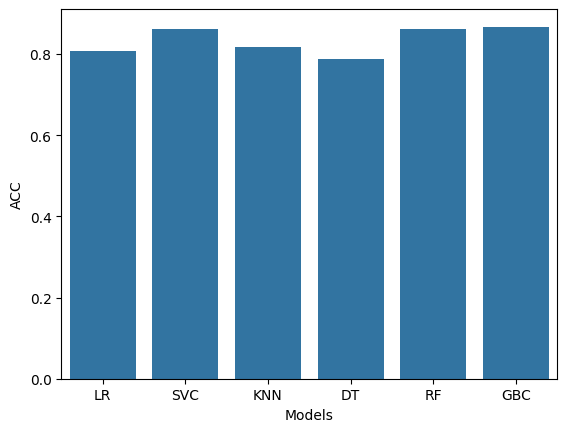

In [109]:
sns.barplot(x='Models', y='ACC', data=final_data )